# Superstore Sales Analysis

#### In this project, we will perform an end-to-end data analysis of the "Superstore" dataset. The goal is to clean the data, explore it to find

#### patterns, and derive actionable insights. We will answer the following key business questions:

#### ---What are our top-performing categories and products?

#### ---When are our peak sales periods?

#### ---Where are our most valuable regions and markets?

#### ---Who are our most important customers and segments?

## 1.Setup: Importing Libraries:
#### We'll begin by importing all the necessary libraries for data manipulation(pandas), numerical operations (numpy), and visualization (matplotlib, seaborn).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Data Loading and Cleaning:
#### In this phase, we load the raw .csv file into a pandas DataFrame and begin the cleaning process to handle missing values, duplicates, and incorrect data types.

### 2.1. Load and Inspect Data:
#### First, we load the data and use df.head() to see the first few rows and df.info() to get a summary of our columns, data types, and any missing data.

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### 2.2. Handle Missing Data:
#### We'll check the count of missing values and then use "forward fill" (ffill) to fill the 11 missing postal codes. We then verify that all null values are handled.

In [4]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [31]:
df=df.ffill()

In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### 2.3. Check for Duplicates
#### We check for any exact duplicate rows in the dataset.

In [8]:
df.duplicated().sum()

np.int64(0)

### 2.4. Correct Data Types
#### We convert Order Date and Ship Date to proper datetime objects for time series analysis. We also convert Postal Code to a string, as it is an identifier, not a number for calculation.

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst = True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst = True)

In [13]:
df['Postal Code'] = df['Postal Code'].astype(int).astype(str)

### 3. Feature Engineering
#### Now that the data is clean, we can create new columns (features) to add value. We'll create a Days to Ship column by subtracting Order Date from Ship Date to analyze logistics efficiency.

In [15]:
time_delta = df['Ship Date'] - df['Order Date']
df['Days to Ship'] = time_delta.dt.days

### 4. Exploratory Data Analysis (EDA):
#### With a clean and prepared DataFrame, we can now explore the data to find patterns and answer our key business questions.

### 4.1. Statistical Summary:
#### We start with df.describe() to get a high-level statistical overview of our numerical columns.

In [16]:
df.describe()

,Row ID,Order Date,Ship Date,Sales,Days to Ship
count,9800.000000,9800,9800,9800.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059,3.961122
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000,0.000000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000,3.000000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000,4.000000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000,5.000000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000,7.000000
std,2829.160653,NaN,NaN,626.651875,1.749614


### 4.2. Answering "WHAT?": What are our top products and sales patterns

#### Sales Distribution
##### A boxplot confirms our suspicion from df.describe(). We can clearly see many high-value outliers.

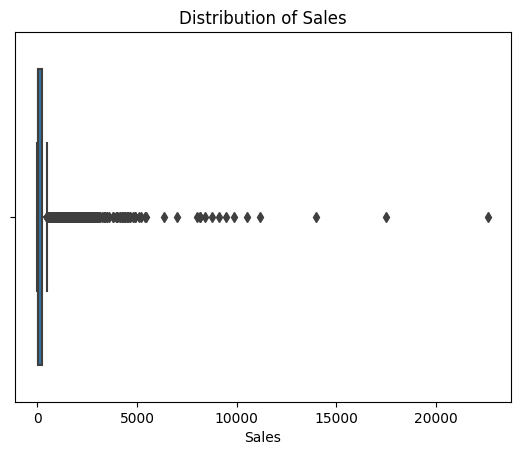

In [17]:
sns.boxplot(data=df, x='Sales')
plt.title('Distribution of Sales')
plt.show()
        

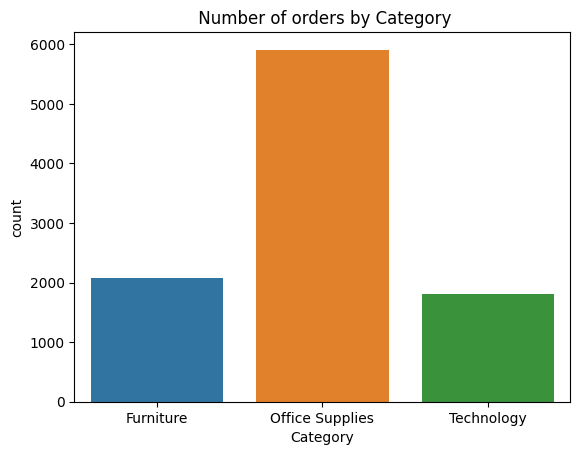

In [18]:
sns.countplot(data =df, x='Category')
plt.title(" Number of orders by Category")
plt.show()

In [19]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
category_sales = category_sales.sort_values(by ='Sales',ascending = False) 
print(category_sales)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


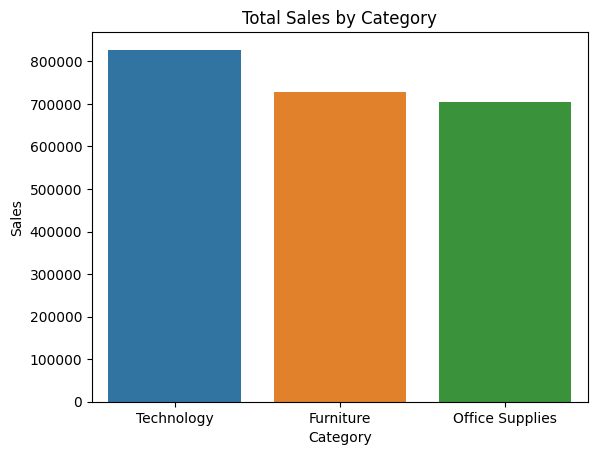

In [20]:
sns.barplot(data = category_sales , x='Category' , y = 'Sales')
plt.title('Total Sales by Category')
plt.show()

#### Key Insight: 'Technology' is our most valuable category, bringing in the most revenue despite having fewer total orders.

### 4.3. Answering "WHEN?": What are the sales trends over time?
#### We'll resample our data by month to look for long-term trends and seasonality.

In [21]:
df_time = df.set_index('Order Date')
montly_sales = df_time['Sales'].resample('ME').sum()
print(montly_sales.head())

Order Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64


C:\Users\malli\AppData\Roaming\Python\Python313\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\malli\AppData\Roaming\Python\Python313\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


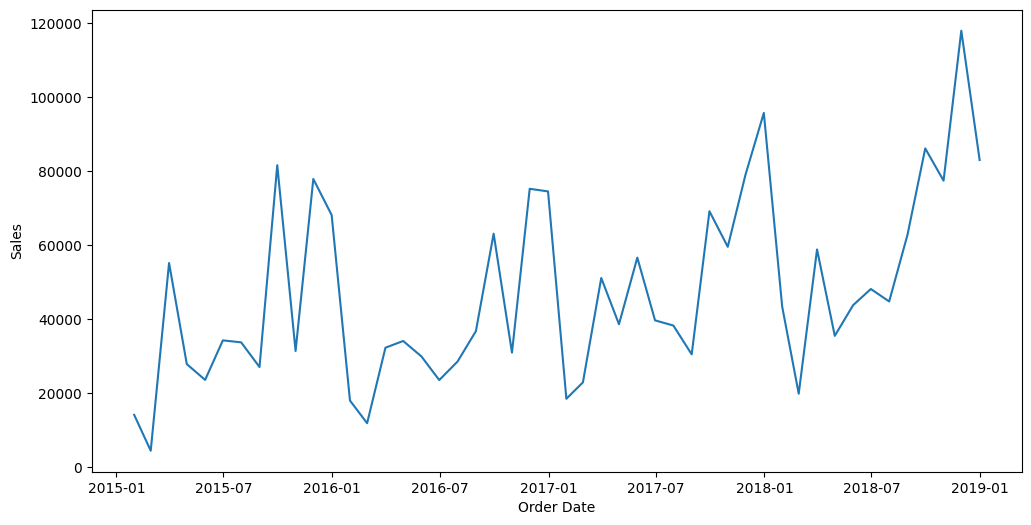

In [22]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = montly_sales)
plt.show()

#### Key Insight: The business is growing year-over-year. There is also strong seasonality, with sales consistently spiking at the end of the year (Q4).

### 5.4. Answering "WHERE?": Where are our best markets?
#### Let's see which regions are driving the most sales.

In [23]:
Region_sales = df.groupby('Region')['Sales'].sum().reset_index()
Region_sales = Region_sales.sort_values(by='Sales', ascending = False)
print(Region_sales)


    Region        Sales
3     West  710219.6845
1     East  669518.7260
0  Central  492646.9132
2    South  389151.4590


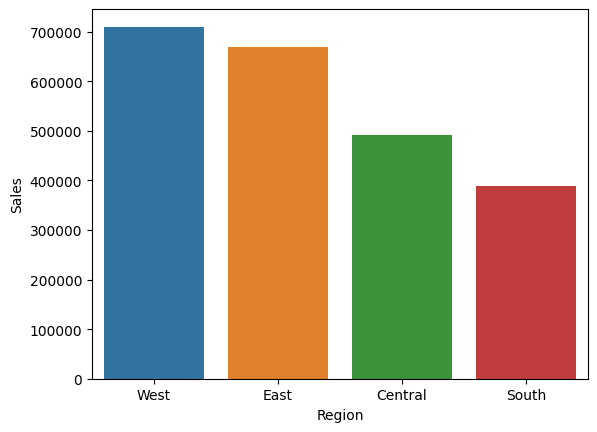

In [24]:
sns.barplot(data = Region_sales, x = 'Region' , y = 'Sales')
plt.show()
            

#### Key Insight: The 'West' region is our top market by total sales.

### 4.5. Answering "WHAT + WHERE?": Which products sell best in which regions?
#### A pivot table and heatmap allow us to analyze three variables at once: Region, Category, and Sales.

In [25]:
region_category_sales = df.pivot_table(
    index='Region', 
    columns='Category', 
    values='Sales', 
    aggfunc='sum'
)

print(region_category_sales)

Category    Furniture  Office Supplies  Technology
Region                                            
Central   160317.4622       163590.243  168739.208
East      206461.3880       199940.811  263116.527
South     116531.4800       124424.771  148195.208
West      245348.2455       217466.509  247404.930


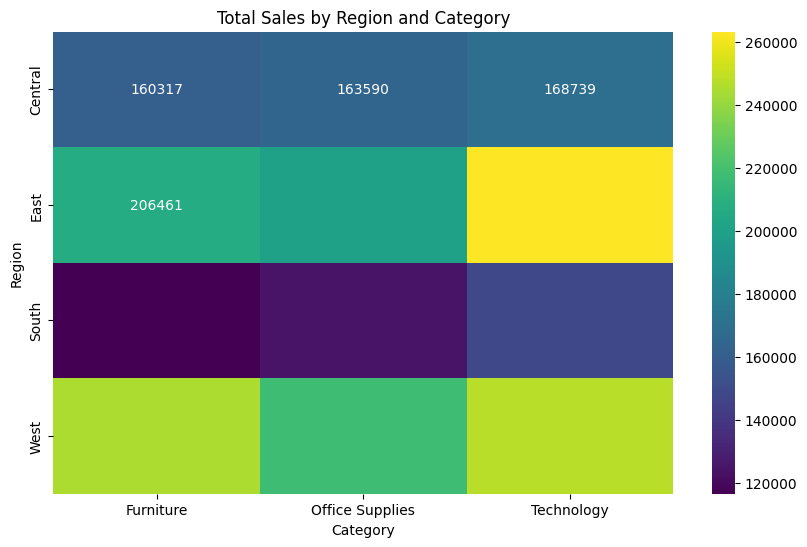

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(region_category_sales, annot=True, fmt='.0f', cmap='viridis')
plt.title('Total Sales by Region and Category')
plt.show()

 #### Key Insight: While 'West' is the top region overall, the 'East' region is the strongest market for 'Technology'.

### 4.6. Answering "WHO?": Who are our most valuable customers?
#### Finally, let's identify our key customer segments and VIPs.

In [27]:
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segment_sales = segment_sales.sort_values(by='Sales', ascending=False)
print(segment_sales)

       Segment         Sales
0     Consumer  1.148061e+06
1    Corporate  6.884941e+05
2  Home Office  4.249822e+05


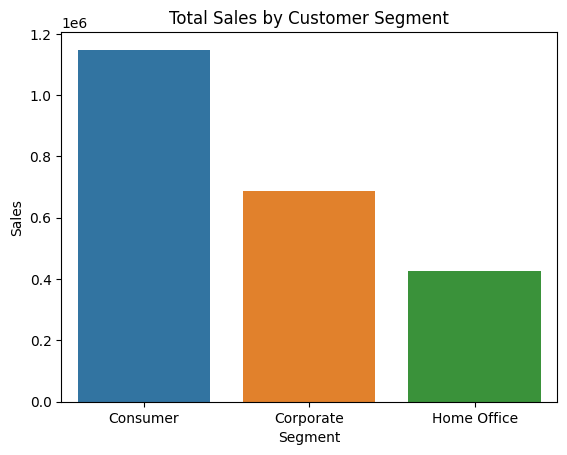

In [28]:
sns.barplot(data=segment_sales, x='Segment', y='Sales')
plt.title('Total Sales by Customer Segment')
plt.show()

#### Key Insight: The 'Consumer' segment is our largest, accounting for over 50% of sales.

### Top 10 VIP Customers
#### Let's identify our top 10 individual customers by name.

In [29]:
top_customers = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()
top_customers = top_customers.sort_values(by='Sales', ascending=False)
print(top_customers.head(10))

    Customer ID       Customer Name      Sales
700    SM-20320         Sean Miller  25043.050
741    TC-20980        Tamara Chand  19052.218
621    RB-19360        Raymond Buch  15117.339
730    TA-21385        Tom Ashbrook  14595.620
6      AB-10105       Adrian Barton  14473.571
434    KL-16645        Ken Lonsdale  14175.229
669    SC-20095        Sanjit Chand  14142.334
327    HL-15040        Hunter Lopez  12873.298
683    SE-20110        Sanjit Engle  12209.438
131    CC-12370  Christopher Conant  12129.072


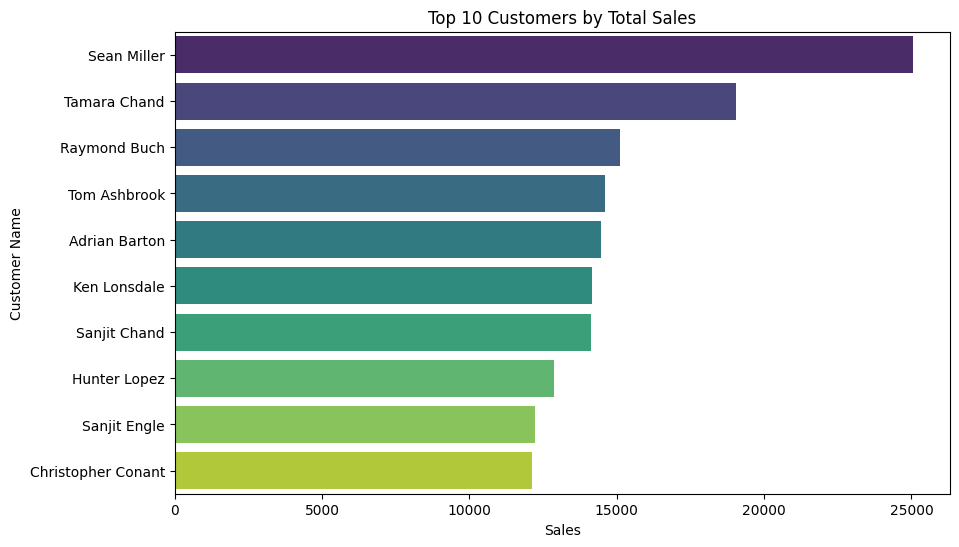

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_customers.head(10), 
    x='Sales', 
    y='Customer Name', 
    palette='viridis' 
)
plt.title('Top 10 Customers by Total Sales')
plt.show()

 #### Key Insight: Sean Miller is our #1 customer by a significant margin, making him a high-value "whale" account.

### Key Findings:
#### Top Category: 'Technology' (by revenue)

#### Top Region: 'West' (by revenue), but 'East' is the top market for 'Technology'.

#### Top Segment: 'Consumer'

#### Top Customer: 'Sean Miller' (a high-value outlier).

#### Key Trend: Sales are growing and show strong seasonality with a spike in Q4.